In [115]:
# Pandas and Numpy for data manipulation
import pandas as pd
import numpy as np

# Set display up to 30 columns of a dataframe
pd.set_option('display.max_columns', 30)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Spliting data into training and testing
from sklearn.model_selection import train_test_split

# Scaling features
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Support Vector Machine
from sklearn.svm import SVC

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Grid search cross validation, Randomized search cross validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# ROC curve, AUC score and classification report
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix

# visualize dicision tree
from sklearn import tree
import graphviz

# LIME for explaining predictions
import lime
import lime.lime_tabular

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Counter
from collections import Counter

# Import Data

In [2]:
lender = pd.read_csv('dataset/loan_table.csv')

In [3]:
borrower = pd.read_csv('dataset/borrower_table.csv')

In [4]:
lender.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid
0,19454,investment,3/15/2012,0,NaN
1,496811,investment,1/17/2012,0,NaN
2,929493,other,2/9/2012,0,NaN
3,580653,other,6/27/2012,1,1.0
4,172419,business,5/21/2012,1,0.0


In [5]:
borrower.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1


In [6]:
lender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 5 columns):
loan_id         101100 non-null int64
loan_purpose    101100 non-null object
date            101100 non-null object
loan_granted    101100 non-null int64
loan_repaid     47654 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.9+ MB


In [7]:
borrower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 12 columns):
loan_id                                            101100 non-null int64
is_first_loan                                      101100 non-null int64
fully_repaid_previous_loans                        46153 non-null float64
currently_repaying_other_loans                     46153 non-null float64
total_credit_card_limit                            101100 non-null int64
avg_percentage_credit_card_limit_used_last_year    94128 non-null float64
saving_amount                                      101100 non-null int64
checking_amount                                    101100 non-null int64
is_employed                                        101100 non-null int64
yearly_salary                                      101100 non-null int64
age                                                101100 non-null int64
dependent_number                                   101100 non-null int64
dtypes: fl

In [8]:
lender.describe()

,loan_id,loan_granted,loan_repaid
count,101100.000000,101100.000000,47654.000000
mean,499666.826726,0.471355,0.644353
std,288662.006929,0.499181,0.478714
min,30.000000,0.000000,0.000000
25%,250333.750000,0.000000,0.000000
50%,499885.000000,0.000000,1.000000
75%,749706.250000,1.000000,1.000000
max,999987.000000,1.000000,1.000000


In [9]:
borrower.describe()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
count,101100.000000,101100.000000,46153.000000,46153.000000,101100.000000,94128.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000
mean,499666.826726,0.543492,0.899291,0.364332,4112.743818,0.724140,1799.617616,3177.150821,0.658675,21020.727992,41.491632,3.864748
std,288662.006929,0.498107,0.300946,0.481247,2129.121462,0.186483,1400.545141,2044.448155,0.474157,18937.581415,12.825570,2.635491
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,250333.750000,0.000000,1.000000,0.000000,2700.000000,0.600000,834.000000,1706.000000,0.000000,0.000000,32.000000,2.000000
50%,499885.000000,1.000000,1.000000,0.000000,4100.000000,0.730000,1339.000000,2673.000000,1.000000,21500.000000,41.000000,3.000000
75%,749706.250000,1.000000,1.000000,1.000000,5500.000000,0.860000,2409.000000,4241.000000,1.000000,35300.000000,50.000000,6.000000
max,999987.000000,1.000000,1.000000,1.000000,13500.000000,1.090000,10641.000000,13906.000000,1.000000,97200.000000,79.000000,8.000000


# Split and Merge Tables

## Split table

In [10]:
granted = lender[lender['loan_repaid'].notnull()]

In [11]:
granted.head(10)

,loan_id,loan_purpose,date,loan_granted,loan_repaid
3,580653,other,6/27/2012,1,1.0
4,172419,business,5/21/2012,1,0.0
6,780070,business,3/14/2012,1,1.0
7,303138,emergency_funds,8/31/2012,1,0.0
8,91475,investment,5/25/2012,1,1.0
15,502729,emergency_funds,5/2/2012,1,0.0
18,11272,home,7/30/2012,1,0.0
22,751153,home,12/18/2012,1,1.0
23,163069,business,10/18/2012,1,1.0
25,180527,business,10/9/2012,1,1.0


In [12]:
granted['loan_id'].count()

47654

In [13]:
not_granted = lender[lender['loan_repaid'].isnull()]

In [14]:
not_granted.head(10)

,loan_id,loan_purpose,date,loan_granted,loan_repaid
0,19454,investment,3/15/2012,0,NaN
1,496811,investment,1/17/2012,0,NaN
2,929493,other,2/9/2012,0,NaN
5,77085,other,8/31/2012,0,NaN
9,422392,business,10/25/2012,0,NaN
10,725653,home,3/14/2012,0,NaN
11,100545,business,12/20/2012,0,NaN
12,597342,home,7/4/2012,0,NaN
13,484791,investment,7/10/2012,0,NaN
14,502241,home,2/17/2012,0,NaN


In [15]:
not_granted['loan_id'].count()

53446

## Join table

In [89]:
notgrand_merge = pd.merge(not_granted, borrower, on = ['loan_id'], how='inner')

In [91]:
notgrand_merge.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,19454,investment,3/15/2012,0,NaN,1,NaN,NaN,8600,0.79,1491,6285,1,45200,42,7
1,496811,investment,1/17/2012,0,NaN,1,NaN,NaN,5300,0.52,141,5793,0,0,42,5
2,929493,other,2/9/2012,0,NaN,1,NaN,NaN,0,NaN,660,3232,1,26500,60,4
3,77085,other,8/31/2012,0,NaN,1,NaN,NaN,3000,0.82,1028,3269,0,0,45,3
4,422392,business,10/25/2012,0,NaN,0,1.0,1.0,1000,1.09,134,1408,0,0,36,2


In [16]:
grand_merge = pd.merge(granted, borrower, on = ['loan_id'], how='inner')

In [17]:
grand_merge.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,580653,other,6/27/2012,1,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
1,172419,business,5/21/2012,1,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4
2,780070,business,3/14/2012,1,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2
3,303138,emergency_funds,8/31/2012,1,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2
4,91475,investment,5/25/2012,1,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1


## Set new index

In [18]:
grand_merge = grand_merge.set_index('loan_id')

In [19]:
grand_merge.head()

,loan_purpose,date,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
loan_id,,,,,,,,,,,,,,,
580653,other,6/27/2012,1,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
172419,business,5/21/2012,1,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4
780070,business,3/14/2012,1,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2
303138,emergency_funds,8/31/2012,1,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2
91475,investment,5/25/2012,1,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1


In [20]:
grand_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47654 entries, 580653 to 779254
Data columns (total 15 columns):
loan_purpose                                       47654 non-null object
date                                               47654 non-null object
loan_granted                                       47654 non-null int64
loan_repaid                                        47654 non-null float64
is_first_loan                                      47654 non-null int64
fully_repaid_previous_loans                        21865 non-null float64
currently_repaying_other_loans                     21865 non-null float64
total_credit_card_limit                            47654 non-null int64
avg_percentage_credit_card_limit_used_last_year    46751 non-null float64
saving_amount                                      47654 non-null int64
checking_amount                                    47654 non-null int64
is_employed                                        47654 non-null int64
yearly_sala

In [21]:
grand_merge.describe()

,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
count,47654.0,47654.000000,47654.000000,21865.000000,21865.000000,47654.000000,46751.000000,47654.000000,47654.000000,47654.000000,47654.000000,47654.000000,47654.000000
mean,1.0,0.644353,0.541172,0.902493,0.297736,4527.848659,0.700091,2022.366580,3499.160595,0.909829,29245.991942,41.524657,3.752445
std,0.0,0.478714,0.498307,0.296654,0.457273,1975.127016,0.177729,1493.410303,2155.128304,0.286429,16286.512395,12.817587,2.621351
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,1.0,0.000000,0.000000,1.000000,0.000000,3100.000000,0.580000,914.000000,1873.000000,1.000000,18900.000000,32.000000,2.000000
50%,1.0,1.000000,1.000000,1.000000,0.000000,4400.000000,0.710000,1553.000000,3024.500000,1.000000,29400.000000,41.000000,3.000000
75%,1.0,1.000000,1.000000,1.000000,1.000000,5800.000000,0.830000,2878.000000,4842.000000,1.000000,40200.000000,50.000000,6.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,13500.000000,1.090000,10641.000000,13165.000000,1.000000,97200.000000,79.000000,8.000000


# Data Preprocessing

## Drop columns
<p>'loan_purpose' and 'date' is not important in this model, we drop them
<p> 'loan_granted' is all 1, we drop it

In [22]:
 grand_merge = grand_merge.drop(columns=['loan_purpose', 'date', 'loan_granted'])

In [23]:
grand_merge.head()

,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
loan_id,,,,,,,,,,,,
580653,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
172419,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4
780070,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2
303138,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2
91475,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1


## Fill NA
The NA in 'fully_repaid_previous_loans' and 'currently_repaying_other_loans' both means this is the first loan, it can be regard as the third type, we make them both 2

In [24]:
grand_merge = grand_merge.fillna(2)

In [25]:
grand_merge.head()

,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
loan_id,,,,,,,,,,,,
580653,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
172419,0.0,1,2.0,2.0,2900,0.76,1050,3695,1,34800,31,4
780070,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2
303138,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2
91475,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1


# Exploratory Data Analysis

In [81]:
# Plot style
figsize(8,8)

plt.style.use('fivethirtyeight')

## Employment Distribution

Text(0.5,1,'Employment Counts for Granted Loan')

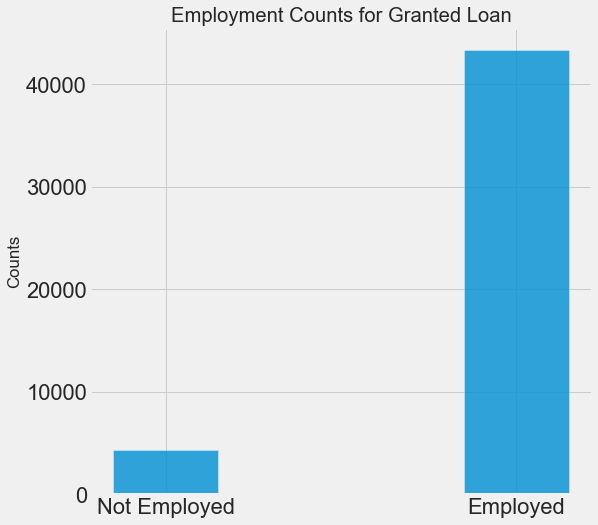

In [94]:
xlabel = ('Not Employed', 'Employed')
x = [0,1]
counts = [grand_merge.is_employed[grand_merge['is_employed'] == 0].count(), grand_merge.is_employed[grand_merge['is_employed'] == 1].count()]
plt.bar(x, counts, width=0.3, align='center', alpha = 0.8)
plt.xticks(x, xlabel)
plt.ylabel('Counts')
plt.title('Employment Counts for Granted Loan')

Text(0.5,1,'Employment Counts for Not Granted Loan')

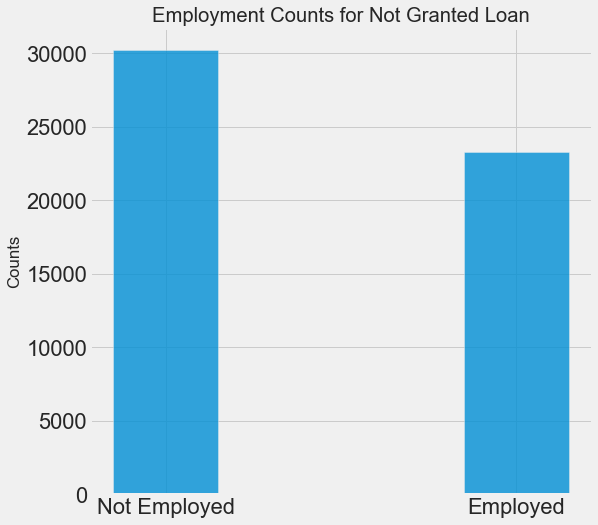

In [93]:
xlabel = ('Not Employed', 'Employed')
x = [0,1]
counts = [notgrand_merge.is_employed[notgrand_merge['is_employed'] == 0].count(),notgrand_merge.is_employed[notgrand_merge['is_employed'] == 1].count()]
plt.bar(x, counts, width=0.3, align='center', alpha = 0.8)
plt.xticks(x, xlabel)
plt.ylabel('Counts')
plt.title('Employment Counts for Not Granted Loan')

### Conclusion: It looks like bank's model tends to borrow money to employed people.

# Repaid Distribution

Text(0.5,1,'Loan Repaid Counts')

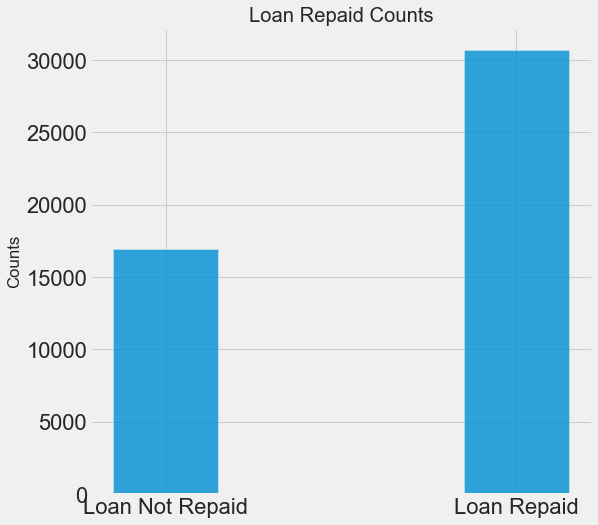

In [95]:
xlabel = ('Loan Not Repaid', 'Loan Repaid')
x = [0,1]
counts = [grand_merge.loan_repaid[grand_merge['loan_repaid'] == 0].count(), grand_merge.loan_repaid[grand_merge['loan_repaid'] == 1].count()]
plt.bar(x, counts, width=0.3, align='center', alpha = 0.8)
plt.xticks(x, xlabel)
plt.ylabel('Counts')
plt.title('Loan Repaid Counts')

### Conclusion: For the people granted loans by the bank, about one third of them did not repaid the loan. We can not say the bank has a very good model.

## Compare Employment with Loan Repaid

In [101]:
paid_em = grand_merge.loan_repaid[(grand_merge['loan_repaid']==1) & (grand_merge['is_employed']==1)].count()
paid_unem = grand_merge.loan_repaid[(grand_merge['loan_repaid']==1) & (grand_merge['is_employed']==0)].count()
unpaid_em = grand_merge.loan_repaid[(grand_merge['loan_repaid']==0) & (grand_merge['is_employed']==1)].count()
unpaid_unem = grand_merge.loan_repaid[(grand_merge['loan_repaid']==0) & (grand_merge['is_employed']==0)].count()

In [108]:
print('There are {:.2f} percent of employed people did not repaid the loan.'.format(unpaid_em/(unpaid_em+paid_em)*100))

There are 30.96 percent of employed people did not repaid the loan.


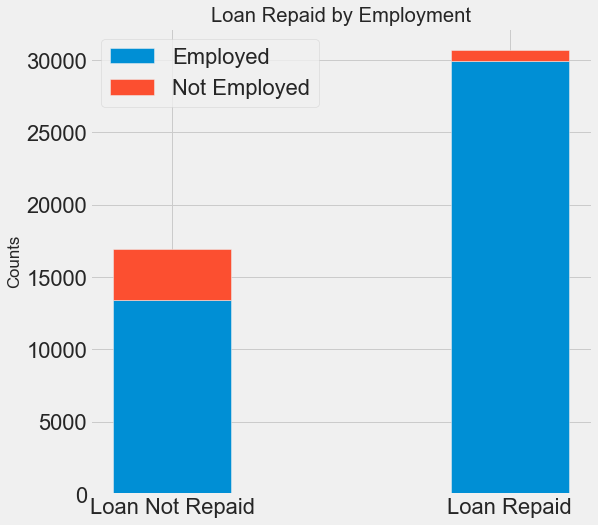

In [107]:
N = 2
em = (unpaid_em, paid_em)
unem = (unpaid_unem, paid_unem)

ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, em, width)
p2 = plt.bar(ind, unem, width, bottom=em)

plt.ylabel('Counts')
plt.title('Loan Repaid by Employment')
plt.xticks(ind, ('Loan Not Repaid', 'Loan Repaid'))
plt.legend((p1[0], p2[0]),('Employed', 'Not Employed'))

### Conclusion: The employment is a fair indicator of if the applicant can repaid the loan, but not a perfect one, since there are nearly 40% of applicants who was employed but did not repaid the loan.

## Repaid v.s. Saving Amount

In [109]:
# Define a function plot density

def kdeplot(col: str): # col is column name
    # Create a new figure
    plt.figure()
    types = [0, 1]

    for type in types:
        # Select churn type
        subset = grand_merge[grand_merge['loan_repaid'] == type]

        if type == 1:
            label = 'Loan Repaid'
        else:
            label = 'Loan Not Repaid'

        # Density plot
        sns.kdeplot(subset[col].dropna(),
                   label = label, shade = False, alpha = 0.8);
    # label the plot
    plt.xlabel(col, SIZE = 20); plt.ylabel('Density', size=20);
    plt.title('Density Plot of ' + col, size=20)

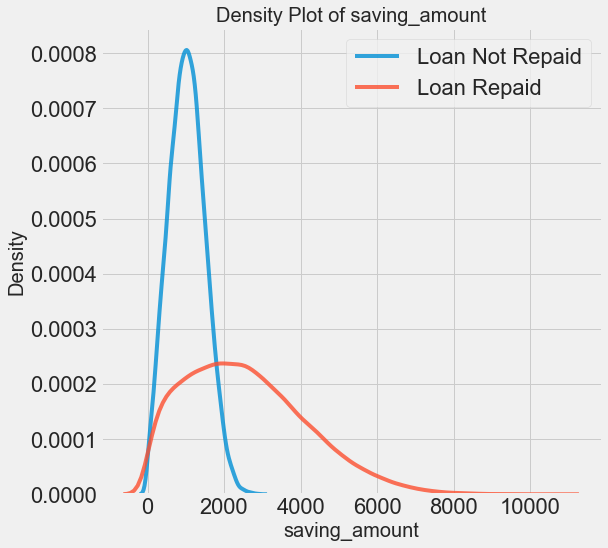

In [110]:
kdeplot('saving_amount')

### Conclustion: It is obvious that the applicants who not repaid the load are aggregated in the zone saving amount is between 0 to 2000. So applicants who has less than 2000 savings are more likely not to repaid the loan. The saving amout is a very good indicator. On the other hand, applicants who has saving amount more than 2000 are very likely to repaid the loan.

## Repaid v.s. Saving Amount

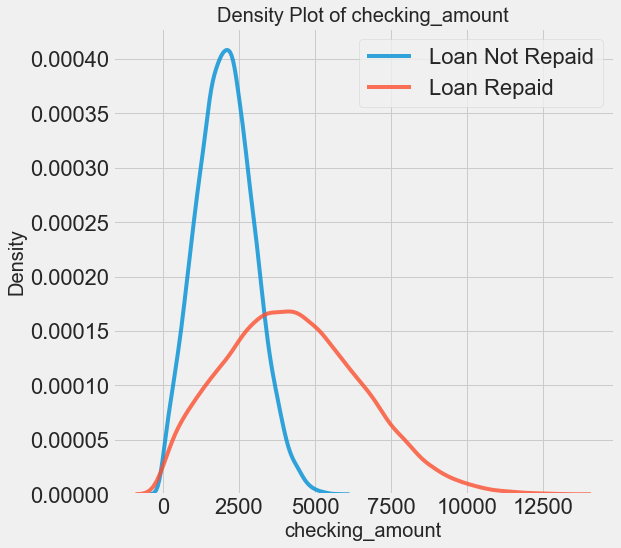

In [111]:
kdeplot('checking_amount')

### Conclusion: Again, we observe the similar results as the saving amout. People have checking amount less than 5000 are likely not repaid the loan.

# Train Test Split

In [26]:
X = grand_merge.drop(columns=['loan_repaid'])
y = grand_merge['loan_repaid']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y,random_state=21)

# Normalization and Scaling

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train Model

## Define a function to evaluate model 

In [31]:
def fit_and_evaluate(model, model_name:str):
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    model_pred = model.predict(X_test)
    
    # Model Accuracy Score
    model_score = model.score(X_test, y_test)*100
    
    print(model_name, 'model accuracy score is {0: .2f}%'.format(model_score))
    
    return model_score

## KNN

In [32]:
knn = KNeighborsClassifier()

In [33]:
knn_score = fit_and_evaluate(knn, 'knn')

knn model accuracy score is  90.85%


## Logistic Regression

In [34]:
log_reg = LogisticRegression()

In [35]:
log_reg_score = fit_and_evaluate(log_reg, 'Logistic Regression')

Logistic Regression model accuracy score is  90.25%


## Linear SVM

In [36]:
svc = SVC(kernel='linear')

In [37]:
linear_svm_score = fit_and_evaluate(svc, 'Linear SVM')

Linear SVM model accuracy score is  90.46%


## Non-linear SVM

In [38]:
svc = SVC(kernel='rbf')

In [39]:
nonlinear_svm_score = fit_and_evaluate(svc, 'Non-Linear SVM')

Non-Linear SVM model accuracy score is  92.40%


## Decision Tree

In [40]:
tree = DecisionTreeClassifier()

In [41]:
tree_score = fit_and_evaluate(tree, 'Decision Tree Classifier')

Decision Tree Classifier model accuracy score is  88.10%


## Gradient Boosting

In [42]:
gradient_boost = GradientBoostingClassifier()

In [43]:
gradient_boost_score = fit_and_evaluate(gradient_boost, 'Gradient Boosting Classifier')

Gradient Boosting Classifier model accuracy score is  92.67%


# Models performance comparison

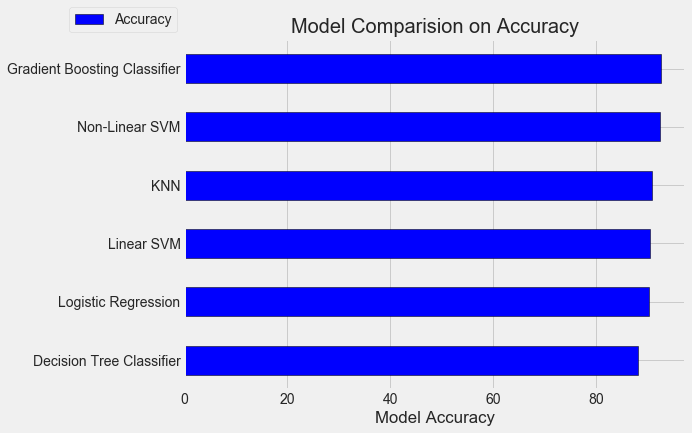

In [44]:
# Plot differenct model accuracy score

plt.style.use('fivethirtyeight')
figsize(8,6)

# Create dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['KNN', 'Logistic Regression', 'Linear SVM', 'Non-Linear SVM', 
                                           'Decision Tree Classifier', 'Gradient Boosting Classifier'],
                                  'Accuracy': [knn_score, log_reg_score, linear_svm_score, nonlinear_svm_score, 
                                               tree_score, gradient_boost_score]})

# Horizontal bar chart of test accuracy
model_comparison.sort_values('Accuracy', ascending=True).plot(x = 'model', y = 'Accuracy', kind = 'barh',
                                                              color = 'blue', edgecolor = 'black')

# Plot formatting
plt.ylabel('');
plt.yticks(size = 14);
plt.xlabel('Model Accuracy');
plt.xticks(size = 14);
plt.legend(loc = 'lower right', bbox_to_anchor=(0, 1), fontsize=14)
plt.title('Model Comparision on Accuracy', size=20);

# Gradient Boosting: Cross validation and Hyperparameter Tuning

In [45]:
# default parameters
gradient_boost

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [46]:
# loss function to be optimized
loss = ['deviance', 'exponential']

In [47]:
# learning rate
learning_rate = [0.05, 0.1]

In [48]:
# number of trees
n_estimators = [100, 300]

In [49]:
# maximum depth of the individual regression estimator
max_depth = [ 3, 6]

In [50]:
# The minimum number of samples required to split an internal node
min_samples_split = [20, 40]

In [51]:
# The minimum number of samples required to be at a leaf node
min_samples_leaf = [4,8]

In [52]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'learning_rate': learning_rate,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_split': min_samples_split,
                       'min_samples_leaf': min_samples_leaf}

In [53]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingClassifier(random_state=21)

In [54]:
# Gridsearch Cross Validation with 5-folds
random_cv = RandomizedSearchCV(estimator = model, param_distributions=hyperparameter_grid, cv = 3, random_state=21)

In [55]:
%%time
# Fit on the training data
random_cv.fit(X_train, y_train)

Wall time: 1min 45s


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=21, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'loss': ['deviance', 'exponential'], 'learning_rate': [0.05, 0.1], 'n_estimators': [100, 300], 'max_depth': [3, 6], 'min_samples_split': [20, 40], 'min_samples_leaf': [4, 8]},
          pre_dispatch='2*n_jobs', random_state=21, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [56]:
# Best estimator
random_cv.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=4, min_samples_split=20,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=21, subsample=1.0, verbose=0,
              warm_start=False)

In [57]:
# Best score
random_cv.best_score_

0.9197334942160901

In [58]:
# Best parameters
random_cv.best_params_

{'n_estimators': 300,
 'min_samples_split': 20,
 'min_samples_leaf': 4,
 'max_depth': 3,
 'loss': 'exponential',
 'learning_rate': 0.05}

# Evaluate Tuned Model On The Test Data

In [59]:
# select the best model
best_model = random_cv.best_estimator_

best_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=4, min_samples_split=20,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=21, subsample=1.0, verbose=0,
              warm_start=False)

In [60]:
%%time
# best model fit on the train data
best_model.fit(X_train, y_train)

Wall time: 4.76 s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=4, min_samples_split=20,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=21, subsample=1.0, verbose=0,
              warm_start=False)

In [63]:
# predict on the test data
best_pred = best_model.predict(X_test)

In [61]:
# Accuracy score
best_accuracy = best_model.score(X_test, y_test)

# print best accuracy score
print(' Tuned Gradient Boosting model accuracy score is {0: .2f}%'.format(best_accuracy * 100))

 Tuned Gradient Boosting model accuracy score is  92.54%


# Confusion Matrix & Classification Report

In [68]:
# confution matrix
print(confusion_matrix(y_test, best_pred))

[[3080  310]
 [ 401 5740]]


In [64]:
# Classification report
print(classification_report(y_test, best_pred))

             precision    recall  f1-score   support

        0.0       0.88      0.91      0.90      3390
        1.0       0.95      0.93      0.94      6141

avg / total       0.93      0.93      0.93      9531



# ROC and AUC

In [69]:
# Predict probability
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

In [70]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [71]:
# AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# print auc score
print(auc_score)

0.9788988994614755


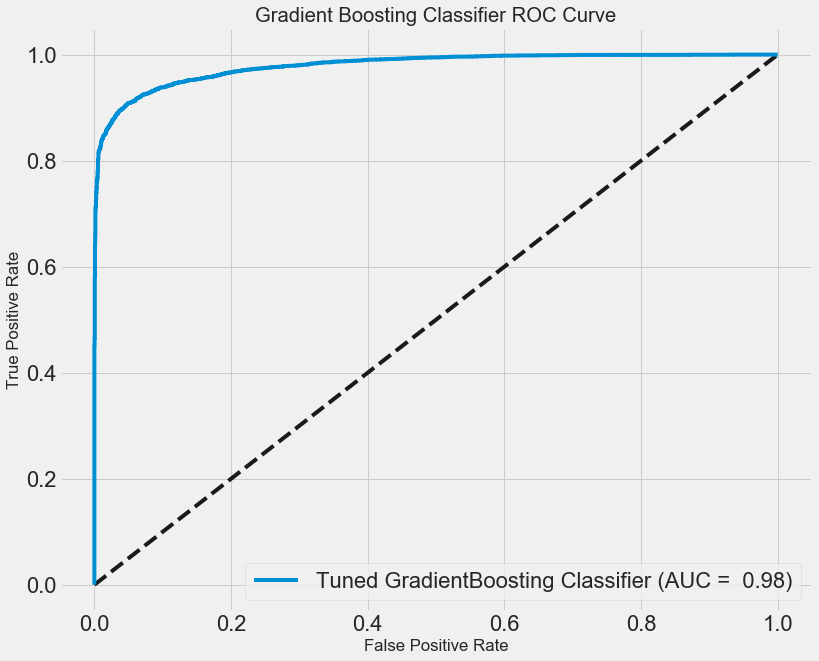

In [72]:
plt.style.use('fivethirtyeight')
figsize(12,10)

# ROC curve plot
_ = plt.plot([0, 1], [0, 1], 'k--')
_ = plt.plot(fpr, tpr, label='Tuned GradientBoosting Classifier (AUC = {: .2f})'.format(auc_score))
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.legend(loc='lower right')
_ = plt.title('Gradient Boosting Classifier ROC Curve')

# Interprete the Model

In [76]:
feature_names = grand_merge.drop(columns = ['loan_repaid']).columns

In [77]:
feature_names

Index(['is_first_loan', 'fully_repaid_previous_loans',
       'currently_repaying_other_loans', 'total_credit_card_limit',
       'avg_percentage_credit_card_limit_used_last_year', 'saving_amount',
       'checking_amount', 'is_employed', 'yearly_salary', 'age',
       'dependent_number'],
      dtype='object')

In [78]:
# Extract the feature importance into a dataframe
feature_results = pd.DataFrame({'Features': list(feature_names),
                               'Importance': best_model.feature_importances_})

feature_results = feature_results.sort_values('Importance', ascending=False).reset_index(drop=True)

feature_results

,Features,Importance
0,saving_amount,0.260580
1,checking_amount,0.235617
2,total_credit_card_limit,0.109984
3,yearly_salary,0.102309
4,avg_percentage_credit_card_limit_used_last_year,0.091527
5,currently_repaying_other_loans,0.058321
6,age,0.040783
7,dependent_number,0.032618
8,is_employed,0.028383
9,fully_repaid_previous_loans,0.028194


Text(0.5,1,'Feature Importances from Random Forest')

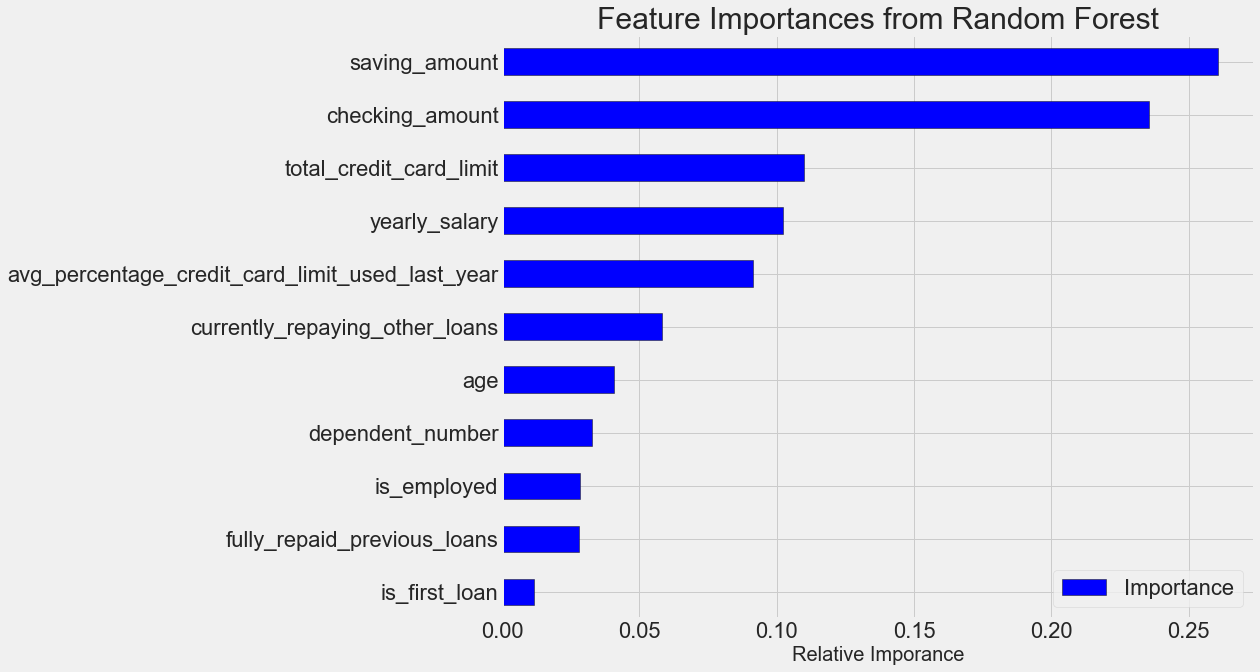

In [80]:
figsize(12, 10)
plt.style.use('fivethirtyeight')

# Plot feature importance in horizontal bar chart
feature_results[::-1].plot(x = 'Features', y= 'Importance',
                    edgecolor='k',
                    kind='barh', color = 'blue');

plt.xlabel('Relative Imporance', size=20);
plt.ylabel('');
plt.title('Feature Importances from Random Forest', size=30)

# Profit Comparison

## Bank Profit on the Test Data

In [116]:
Counter(y_test)

Counter({1.0: 6141, 0.0: 3390})

In [117]:
print('Bank profit on the test data is {}'.format(6141-3390))

Bank profit on the test data is 2751


## Our Model Profit on the Test Data

In [118]:
# confution matrix
print(confusion_matrix(y_test, best_pred))

[[3080  310]
 [ 401 5740]]


### Our profit would the True positive - False positive

In [119]:
print('Our Model Profit is {}'.format(5740-310))

Our Model Profit is 5430


# Conclusion

### 1.  The final model can achive a overal accuracy 92.5%, precision 93%, recall 93% and AUC score 0.98.
### 2.  Model importance analysis corresponds to our exploratoty data analysis part, the saving amount and checking amount are the most important features to determin if an applicant can repaid the loan.
### 3. When the bank determin if grant loan to an applicant, the employment status is an very important feature. But it turns out this feature can not be the dominant feature to determin if grant loan to an applicant.
### 4. The profit using our model is 5430, the profit of bank is 2751. We can achieve nearly twice the profit by implementation of our own machine learning model.
### 5. Other features I would consider are: 1. Marriage status 2. Housing status 3. Education level